# Assignment - 1

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\MOM\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8653 - loss: 0.4316 - val_accuracy: 0.9835 - val_loss: 0.0513
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9824 - loss: 0.0533 - val_accuracy: 0.9879 - val_loss: 0.0395
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9910 - val_loss: 0.0283
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9911 - loss: 0.0264 - val_accuracy: 0.9910 - val_loss: 0.0282
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy: 0.9919 - val_loss: 0.0272
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9951 - loss: 0.0173 - val_accuracy: 0.9903 - val_loss: 0.0292
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9906 - val_loss: 0.0272
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9967 - loss: 0.0095 - val_ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9891 - loss: 0.0459
Test accuracy: 0.991599977016449


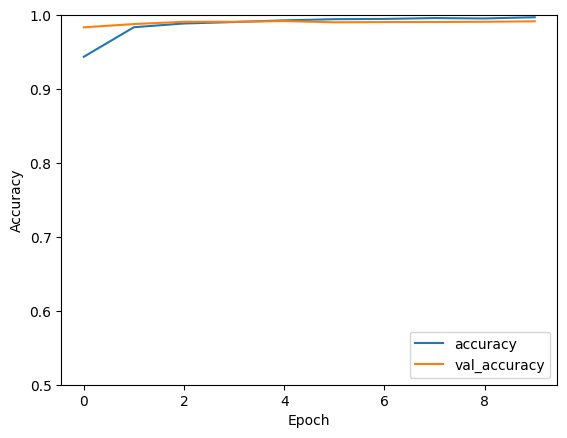

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Test accuracy: {test_acc}')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Assignment - 2

In [7]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32')
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32')

In [10]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)  
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [12]:
BATCH_SIZE = 64
train_dataset = train_dataset.shuffle(buffer_size=60000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

In [13]:
logdir = "./logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [14]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(train_dataset,
                    epochs=10,
                    batch_size=BATCH_SIZE,
                    validation_data=test_dataset,
                    callbacks=[tensorboard_callback])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8630 - loss: 0.4306 - val_accuracy: 0.9852 - val_loss: 0.0441
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9834 - loss: 0.0555 - val_accuracy: 0.9853 - val_loss: 0.0410
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9890 - loss: 0.0349 - val_accuracy: 0.9883 - val_loss: 0.0340
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9908 - loss: 0.0287 - val_accuracy: 0.9856 - val_loss: 0.0445
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9926 - loss: 0.0229 - val_accuracy: 0.9904 - val_loss: 0.0345
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9936 - loss: 0.0183 - val_accuracy: 0.9915 - val_loss: 0.0274
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.9904 - val_loss: 0.0303
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9956 - loss: 0.0134 - 

# Assignment - 3

In [17]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [19]:
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32')
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32')

In [20]:
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

In [21]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
BATCH_SIZE = 20
num_epochs = 10

optimizer = tf.keras.optimizers.Adam()

for epoch in range(num_epochs):
    for batch_data, batch_labels in train_dataset:
        with tf.GradientTape() as tape:
            predictions = model(batch_data)
            loss = tf.keras.losses.categorical_crossentropy(batch_labels, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

In [24]:
history = model.fit(train_dataset,
                    epochs=num_epochs,
                    validation_data=test_dataset,
                    callbacks=[tensorboard_callback])

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9974 - loss: 0.0083 - val_accuracy: 0.9914 - val_loss: 0.0326
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9926 - val_loss: 0.0293
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9979 - loss: 0.0066 - val_accuracy: 0.9908 - val_loss: 0.0385
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9976 - loss: 0.0062 - val_accuracy: 0.9909 - val_loss: 0.0393
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9915 - val_loss: 0.0337
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9917 - val_loss: 0.0382
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9979 - loss: 0.0067 - val_accuracy: 0.9917 - val_loss: 0.0369
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9992 - loss: 0.0030 - 

# Assignment - 4

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [26]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [27]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [28]:
optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [29]:
@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images, training=True)
        loss = loss_fn(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loss

In [30]:
Epochs = 10

In [31]:
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    for batch_images, batch_labels in tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(50000).batch(32):
        loss = train_step(batch_images, batch_labels)
        epoch_loss_avg.update_state(loss)
    print(f'Epoch {epoch + 1}, Loss: {epoch_loss_avg.result()}')

Epoch 1, Loss: 1.4804041385650635
Epoch 2, Loss: 1.0926038026809692
Epoch 3, Loss: 0.9434162378311157
Epoch 4, Loss: 0.8458486795425415
Epoch 5, Loss: 0.7713299989700317
Epoch 6, Loss: 0.7146577835083008
Epoch 7, Loss: 0.6573739647865295
Epoch 8, Loss: 0.6155546307563782
Epoch 9, Loss: 0.5729621648788452
Epoch 10, Loss: 0.5305843949317932


In [32]:
from tensorflow.keras import layers, models

def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        y = layers.BatchNormalization()(x)
        y = layers.ReLU()(y)
        y = layers.Conv2D(growth_rate, 3, padding='same')(y)
        x = layers.Concatenate()([x, y])
    return x

def build_densenet(input_shape=(32, 32, 3), num_classes=10, num_layers_per_block=3, growth_rate=12):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(16, 3, padding='same')(inputs)
    x = dense_block(x, num_layers_per_block, growth_rate)
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs, outputs)

In [33]:
model = build_densenet()

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_12 (Conv2D)            │ (None, 32, 32, 16)        │             448 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 32, 32, 16)        │              64 │ conv2d_12[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu (ReLU)                  │ (None, 32, 32, 16)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_13 (Conv2D)            │ (None, 32, 32, 12)        │           1,740 │ re_lu[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 32, 32, 28)        │               0 │ conv2d_12[0][0],           │
│                               │                           │                 │ conv2d_13[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 32, 32, 28)        │             112 │ concatenate[0][0]          │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_1 (ReLU)                │ (None, 32, 32, 28)        │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_14 (Conv2D)            │ (None, 32, 32, 12)        │           3,036 │ re_lu_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 32, 32, 40)        │               0 │ concatenate[0][0],         │
│                               │                           │                 │ conv2d_14[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 32, 32, 40)        │             160 │ concatenate_1[0][0]        │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ re_lu_2 (ReLU)                │ (None, 32, 32, 40)        │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_15 (Conv2D)            │ (None, 32, 32, 12)        │           4,332 │ re_lu_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_2 (Concatenate)   │ (None, 32, 32, 52)        │               0 │ concatenate_1[0][0],       │
│                               │                           │                 │ conv2d_15[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 10,422 (40.71 KB)

 Trainable params: 10,254 (40.05 KB)

 Non-trainable params: 168 (672.00 B)

# Assignment - 5

In [36]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 20000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

max_sequence_length = 200  
x_train = pad_sequences(x_train, maxlen=max_sequence_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_sequence_length, padding='post')

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_sequence_length),
    SimpleRNN(units=64),  
    Dense(units=1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\MOM\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
epochs = 10
batch_size = 128
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.5172 - loss: 0.6916 - val_accuracy: 0.5342 - val_loss: 0.6800
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - accuracy: 0.6186 - loss: 0.6296 - val_accuracy: 0.5461 - val_loss: 0.6762
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.6944 - loss: 0.5153 - val_accuracy: 0.5340 - val_loss: 0.7441
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.7486 - loss: 0.4084 - val_accuracy: 0.5399 - val_loss: 0.8372
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.7568 - loss: 0.3757 - val_accuracy: 0.5410 - val_loss: 0.8870
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.7837 - loss: 0.3518 - val_accuracy: 0.5350 - val_loss: 0.8968
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8005 - loss: 0.3301 - val_accuracy: 0.5388 - val_loss: 0.9726
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.8105 - loss: 0.3182 - v

# Assignment - 6

In [39]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
vocab_size = 20000
max_sequence_length = 200

In [41]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [42]:
x_train = pad_sequences(x_train, maxlen=max_sequence_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_sequence_length, padding='post')

In [43]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [44]:
batch_size = 128
train_dataset = train_dataset.shuffle(buffer_size=len(x_train)).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

embedding_dim = 32

In [46]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, mask_zero=True),
    LSTM(units=64),
    Dense(units=1, activation='sigmoid')
])

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
epochs = 10
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 191ms/step - accuracy: 0.6509 - loss: 0.6092 - val_accuracy: 0.8589 - val_loss: 0.3422
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 236ms/step - accuracy: 0.9009 - loss: 0.2619 - val_accuracy: 0.8747 - val_loss: 0.3049
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 231ms/step - accuracy: 0.9469 - loss: 0.1494 - val_accuracy: 0.8592 - val_loss: 0.3724
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 231ms/step - accuracy: 0.9585 - loss: 0.1208 - val_accuracy: 0.8629 - val_loss: 0.3513
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 229ms/step - accuracy: 0.9752 - loss: 0.0806 - val_accuracy: 0.8583 - val_loss: 0.4040
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 228ms/step - accuracy: 0.9836 - loss: 0.0573 - val_accuracy: 0.8518 - val_loss: 0.4558
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 45s 229ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.8478 - val_loss: 0.5672
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 232ms/step - accuracy: 0.9831 - loss: 0

In [50]:
loss, accuracy = model.evaluate(test_dataset)

print(f'Test accuracy: {accuracy * 100:.2f}%')

196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.8525 - loss: 0.6304
Test accuracy: 85.22%


# Assignment - 7

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
import numpy as np

In [52]:
input_texts = ["Input sentence 1"]
target_texts = ["Target sentence 1"] 

In [53]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(input_texts + target_texts)
input_sequences = tokenizer.texts_to_sequences(input_texts)
target_sequences = tokenizer.texts_to_sequences(target_texts)
max_sequence_length = 100
input_sequences_padded = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='post')
target_sequences_padded = pad_sequences(target_sequences, maxlen=max_sequence_length, padding='post')

In [54]:
print("Shapes before splitting:")
print("Input sequences:", input_sequences_padded.shape)
print("Target sequences:", target_sequences_padded.shape)

Shapes before splitting:
Input sequences: (1, 100)
Target sequences: (1, 100)


In [55]:
embedding_dim = 256
latent_dim = 512
num_encoder_tokens = len(tokenizer.word_index) + 1
num_decoder_tokens = num_encoder_tokens

In [56]:
encoder_inputs = Input(shape=(max_sequence_length,))
encoder_embedding = Embedding(input_dim=num_encoder_tokens, output_dim=embedding_dim)(encoder_inputs)
encoder_outputs, state_h, state_c = LSTM(latent_dim, return_state=True)(encoder_embedding)
encoder_states = [state_h, state_c]

In [57]:
decoder_inputs = Input(shape=(max_sequence_length,))
decoder_embedding = Embedding(input_dim=num_decoder_tokens, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

In [58]:
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
output = decoder_dense(decoder_outputs)

In [59]:
model = Model([encoder_inputs, decoder_inputs], output)

In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [61]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_8 (InputLayer)    │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_2 (Embedding)       │ (None, 100, 256)          │           1,280 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_3 (Embedding)       │ (None, 100, 256)          │           1,280 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_1 (LSTM)                 │ [(None, 512), (None,      │       1,574,912 │ embedding_2[0][0]          │
│                               │ 512), (None, 512)]        │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_2 (LSTM)                 │ [(None, 100, 512), (None, │       1,574,912 │ embedding_3[0][0],         │
│                               │ 512), (None, 512)]        │                 │ lstm_1[0][1], lstm_1[0][2] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_11 (Dense)              │ (None, 100, 5)            │           2,565 │ lstm_2[0][0]               │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 3,154,949 (12.04 MB)

 Trainable params: 3,154,949 (12.04 MB)

 Non-trainable params: 0 (0.00 B)

# Assignment - 8

In [72]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Dense, Reshape
from tensorflow.keras.preprocessing.sequence import skipgrams
from tensorflow.keras.preprocessing.text import Tokenizer

In [73]:
corpus = [
    "I like to cuddle dogs",
    "They cuddle with me",
    "Dogs like to play"
]

In [75]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(corpus)

In [76]:
skip_grams = []
for sequence in sequences:
    pairs, labels = skipgrams(sequence, len(word_index) + 1, window_size=2)
    skip_grams.extend(pairs)

In [77]:
target_words = np.array([pair[0] for pair in skip_grams], dtype=np.int32)
context_words = np.array([pair[1] for pair in skip_grams], dtype=np.int32)
labels = np.array(labels, dtype=np.int32)

In [78]:
word_input = Input(shape=(1,))
context_input = Input(shape=(1,))

In [79]:
embedding_dim = 50  
vocabulary_size = len(word_index) + 1

In [80]:
word_embedding = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)(word_input)
context_embedding = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)(context_input)

In [81]:
word_embedding = Reshape((embedding_dim,))(word_embedding)
context_embedding = Reshape((embedding_dim,))(context_embedding)

In [82]:
dot_product = Dot(axes=1)([word_embedding, context_embedding])
output = Dense(1, activation='sigmoid')(dot_product)

In [83]:
model = Model(inputs=[word_input, context_input], outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam')

In [84]:
print(model.summary())

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_12 (InputLayer)   │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_6 (Embedding)       │ (None, 1, 50)             │             500 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_7 (Embedding)       │ (None, 1, 50)             │             500 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape (Reshape)             │ (None, 50)                │               0 │ embedding_6[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 50)                │               0 │ embedding_7[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot (Dot)                     │ (None, 1)                 │               0 │ reshape[0][0],             │
│                               │                           │                 │ reshape_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_12 (Dense)              │ (None, 1)                 │               2 │ dot[0][0]                  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,002 (3.91 KB)

 Trainable params: 1,002 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

None


# Assignment - 9

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.decomposition import PCA 

In [86]:
(x_train, _), (x_test, _) = cifar10.load_data()

In [87]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [88]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [89]:
latent_dim = 128  # Example latent dimension size
input_shape = x_train.shape[1:]

In [90]:
inputs = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
latent_vector = Dense(latent_dim, name='latent_vector')(x)
encoder = Model(inputs, latent_vector, name='encoder')

In [91]:
latent_inputs = Input(shape=(latent_dim,))
x = Dense(np.prod(input_shape))(latent_inputs)
x = Reshape(input_shape)(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
outputs = Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)
decoder = Model(latent_inputs, outputs, name='decoder')

In [92]:
autoencoder_input = Input(shape=input_shape)
autoencoder_output = decoder(encoder(autoencoder_input))
autoencoder = Model(autoencoder_input, autoencoder_output, name='autoencoder')

In [93]:
autoencoder.compile(optimizer=Adam(), loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 94s 236ms/step - loss: 0.0264 - val_loss: 0.0071
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 98s 250ms/step - loss: 0.0063 - val_loss: 0.0052
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 242ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 97s 248ms/step - loss: 0.0049 - val_loss: 0.0049
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 265ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 106s 271ms/step - loss: 0.0047 - val_loss: 0.0047
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 264ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 264ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 103s 264ms/step - loss: 0.0045 - val_loss: 0.0048
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 104s 266ms/step - loss: 0.0046 - val_loss: 0.0046


In [94]:
loss = autoencoder.evaluate(x_test, x_test)
print(f"Test set loss: {loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0046
Test set loss: 0.004601838067173958


In [95]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


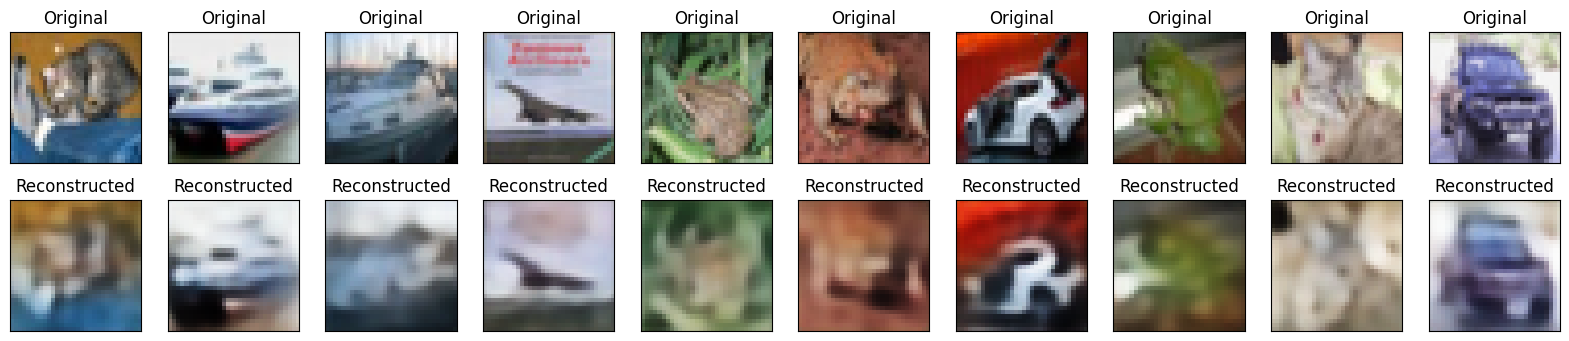

In [96]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [97]:
encoded_imgs = encoder.predict(x_test)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_imgs)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


C:\Users\MOM\AppData\Local\Temp\ipykernel_3692\126294839.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis')


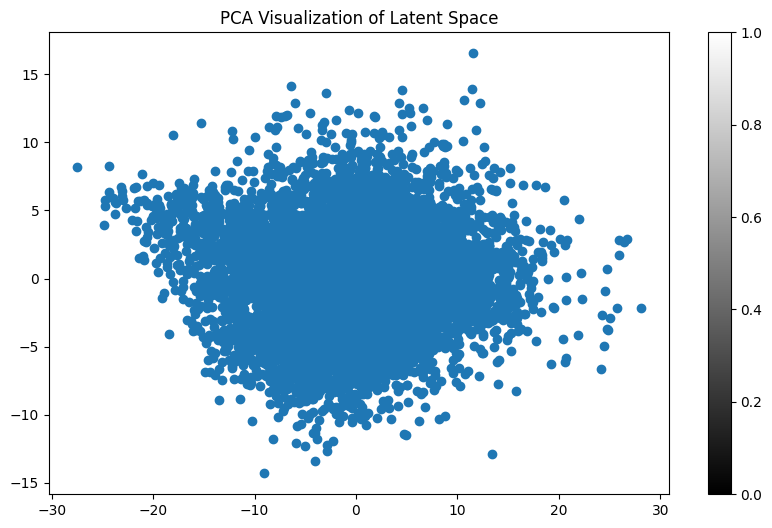

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], cmap='viridis')
plt.colorbar()
plt.title('PCA Visualization of Latent Space')
plt.show()